#### This notebook will include a review a test the visualisation libraries

Libraries that will be reviewed here are:
    1. Mapoltlib
    2. Seaborn
    3. Plotly
    4. Bokeh
    5. Altair
    6. Ggplot

Tests that will be done:
    1. Line & Bar chart
    2. Scatter, including symbols, size and colors; including 2x2.
    3. Histograms (including bins)
    4. Box plots
    5. Sprklines.
    6. Heatmaps.
    7. Waterfalls.
    8. Pair plots.

Those test will include emphasis on those:
    1. Title, legend and annotations (move all arounnd and custom as much as possible).
    2. Grphic changes, background color, gridlines, color of shapes and its edges.
    3. Handling Grouped items.
    
Others:
    1. Check for running time.
    2. Check for graph size.
    3. Check for support of time-series.


#### Imports for the analysis

In [345]:
import pandas as pd
import numpy as np

df = pd.read_csv("BTC-USD.csv")

### Matplotlib

In [70]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import time

Line & Bar charts

In [71]:
# One line plot
t = df['Date'].tolist()
s = df['High'].tolist()

ax.set(xlabel='Date', ylabel='Price',
       title='Bitcoin Price along the years')

ax.grid()
plt.show()

######## Checking for the time needed for excecution #######
start_time = time.time()
print("---running time: %s seconds ---" % (time.time() - start_time))

---running time: 4.8160552978515625e-05 seconds ---


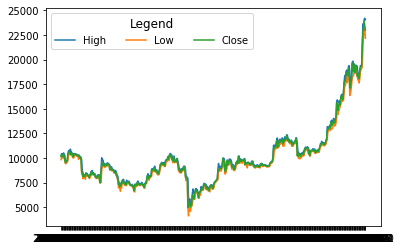

--- Running time: 6.413459777832031e-05 seconds ---


In [72]:
# One line plot
date = df['Date'][1800:].tolist()
high = df['High'][1800:].tolist()
low = df['Low'][1800:].tolist()
close = df['Close'][1800:].tolist()

plt.plot(date, high, label = "High")
plt.plot(date, low, label = "Low")
plt.plot(date, close, label = "Close")
# Display a figure.
plt.legend(title="Legend",title_fontsize='large', ncol=3)
plt.show()

######## Checking for the time needed for excecution #######
start_time = time.time()
print("--- Running time: %s seconds ---" % (time.time() - start_time))

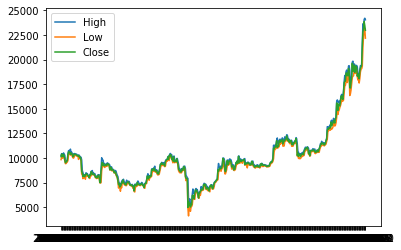

--- Running time: 3.337860107421875e-06 seconds ---


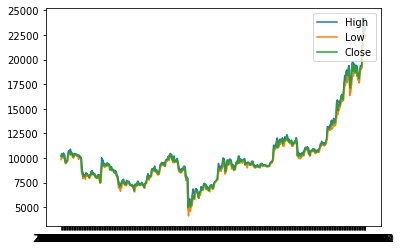

--- Running time: 3.0994415283203125e-06 seconds ---


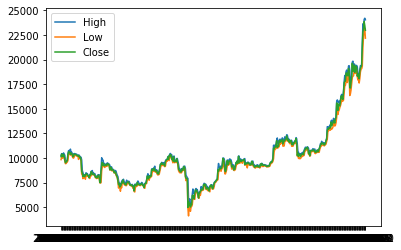

--- Running time: 2.86102294921875e-06 seconds ---


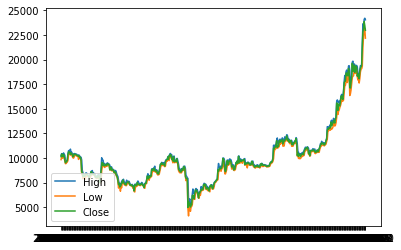

--- Running time: 3.337860107421875e-06 seconds ---


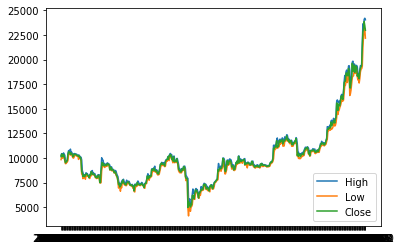

--- Running time: 2.86102294921875e-06 seconds ---


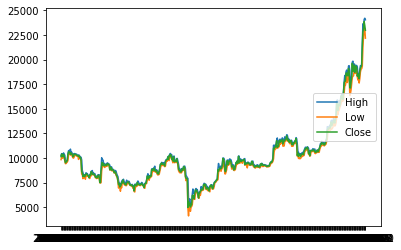

--- Running time: 3.0994415283203125e-06 seconds ---


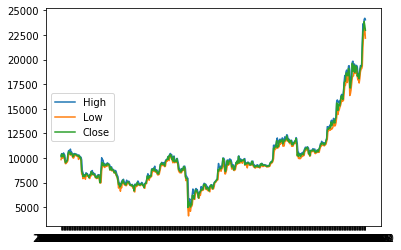

--- Running time: 2.86102294921875e-06 seconds ---


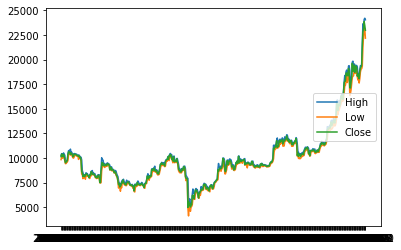

--- Running time: 2.86102294921875e-06 seconds ---


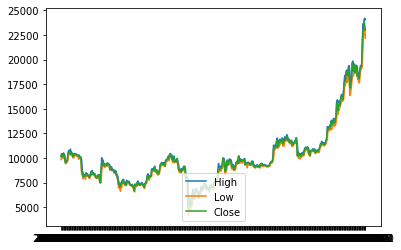

--- Running time: 3.0994415283203125e-06 seconds ---


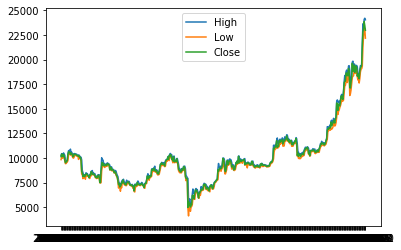

--- Running time: 2.6226043701171875e-06 seconds ---


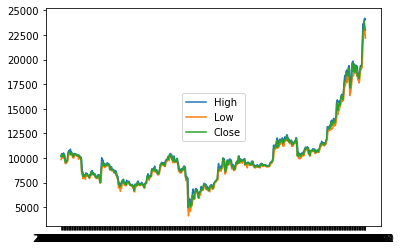

--- Running time: 3.0994415283203125e-06 seconds ---


In [73]:
for i in range(11):
    # One line plot
    date = df['Date'][1800:].tolist()
    high = df['High'][1800:].tolist()
    low = df['Low'][1800:].tolist()
    close = df['Close'][1800:].tolist()

    plt.plot(date, high, label = "High")
    plt.plot(date, low, label = "Low")
    plt.plot(date, close, label = "Close")
    # Display a figure.
    plt.legend(loc=i)
    plt.show()

    ######## Checking for the time needed for excecution #######
    start_time = time.time()
    print("--- Running time: %s seconds ---" % (time.time() - start_time))

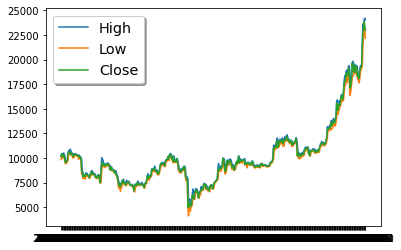

--- Running time: 6.532669067382812e-05 seconds ---


In [74]:

date = df['Date'][1800:].tolist()
high = df['High'][1800:].tolist()
low = df['Low'][1800:].tolist()
close = df['Close'][1800:].tolist()

plt.plot(date, high, label = "High")
plt.plot(date, low, label = "Low")
plt.plot(date, close, label = "Close")
# Display a figure.
plt.legend(shadow=True, fontsize='x-large')
plt.show()

######## Checking for the time needed for excecution #######
start_time = time.time()
print("--- Running time: %s seconds ---" % (time.time() - start_time))

ConversionError: Failed to convert value(s) to axis units: [datetime.date(2019, 9, 1), datetime.date(2019, 12, 1), datetime.date(2020, 2, 1), datetime.date(2020, 5, 1), datetime.date(2020, 8, 1), datetime.date(2020, 11, 1), datetime.date(2020, 12, 21)]

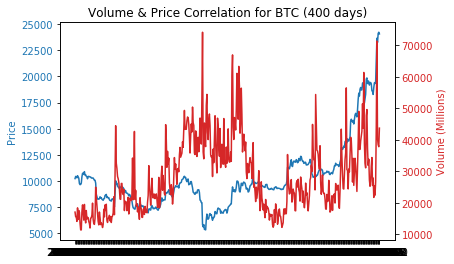

In [75]:
import datetime

# Example of two Y axis

date = df['Date'][1800:].to_numpy()
high = df['High'][1800:].to_numpy()
low = df['Low'][1800:].to_numpy()
close = df['Close'][1800:].to_numpy()
temp_volume = df['Volume'].apply(lambda x : x / 1000000)
volume = temp_volume[1800:].to_numpy()

temp_df = df

# temp_df['Date'] = df['Date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
# temp_date_list = temp_df['Date'].to_numpy()

date_list = ['2019-09-01', '2019-12-01', '2020-02-01', '2020-05-01', '2020-08-01', '2020-11-01', '2020-12-21']
date_list = [(datetime.datetime.strptime(i, '%Y-%m-%d')) for i in date_list]
date_list = [i.date() for i in date_list]

fig, ax1 = plt.subplots()

# plt.figure(figsize=(20,10))

color = 'tab:blue'
# ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(date, high, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Volume (Millions)', color=color)  # we already handled the x-label with ax1
ax2.plot(date, volume, color=color)
ax2.tick_params(axis='y', labelcolor=color)

matplotlib.pyplot.title("Volume & Price Correlation for BTC (400 days)", fontdict=None, loc='center', pad=None)

# TODO - faced issue with configuring the x values, specifically when 2 y axis
plt.xticks(date_list, date_list, rotation=90)
fig.autofmt_xdate()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



In [ ]:
date = df['Date'][2280:].tolist()
high = df['High'][2280:].tolist()
low = df['Low'][2280:].tolist()
close = df['Close'][2280:].tolist()
volume = df['Volume'][2280:].to_numpy()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Volume', color='black')
ax.bar(date, volume)
plt.xticks(rotation='90')
plt.show()

# TODO - check why no work

In [ ]:
date = df['Date'][2280:].tolist()
high = df['High'][2280:].tolist()
low = df['Low'][2280:].tolist()
close = df['Close'][2280:].tolist()
volume = df['Volume'][2280:].to_numpy()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(high) #plot the Revenue on axis #1

# the next few lines plot the fiscal year data as bar plots and changes the color for each.
ax2.bar(date, volume,alpha=0.2, color='orange')
ax2.grid(b=False) # turn off grid #2

ax1.set_title('Highest price of the day and the daily Volume')
ax1.set_ylabel('Price')
ax2.set_ylabel('Volume')

# Set the x-axis labels to be more meaningful than just some random dates.
ax1.axes.set_xticklabels(date_list, rotation=90)

# TODO - check why no work

#### Scatter


In [ ]:
date = df['Date'][1800:].tolist()
high = df['High'][1800:].tolist()
low = df['Low'][1800:].tolist()
close = df['Close'][1800:].tolist()
volume = df['Volume'][1800:].to_numpy()

temp_df_t85 = df.tail(100).nlargest(85, 'Volume')
temp_df_b85 = df.tail(100).nsmallest(15, 'Volume')

fig = plt.figure()
plt.figure(figsize=(20, 8), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(temp_df_t85.Date, temp_df_t85.Volume, marker="P", label='Top T85')
ax1.scatter(temp_df_b85.Date, temp_df_b85.Volume, marker='o', label='Bottom Q85')

ax1.axes.set_xticklabels(date_list, rotation=90)
ax.set_xlim(['2019-09-01', '2020-12-31'])
plt.show()


<Figure size 640x480 with 0 Axes>

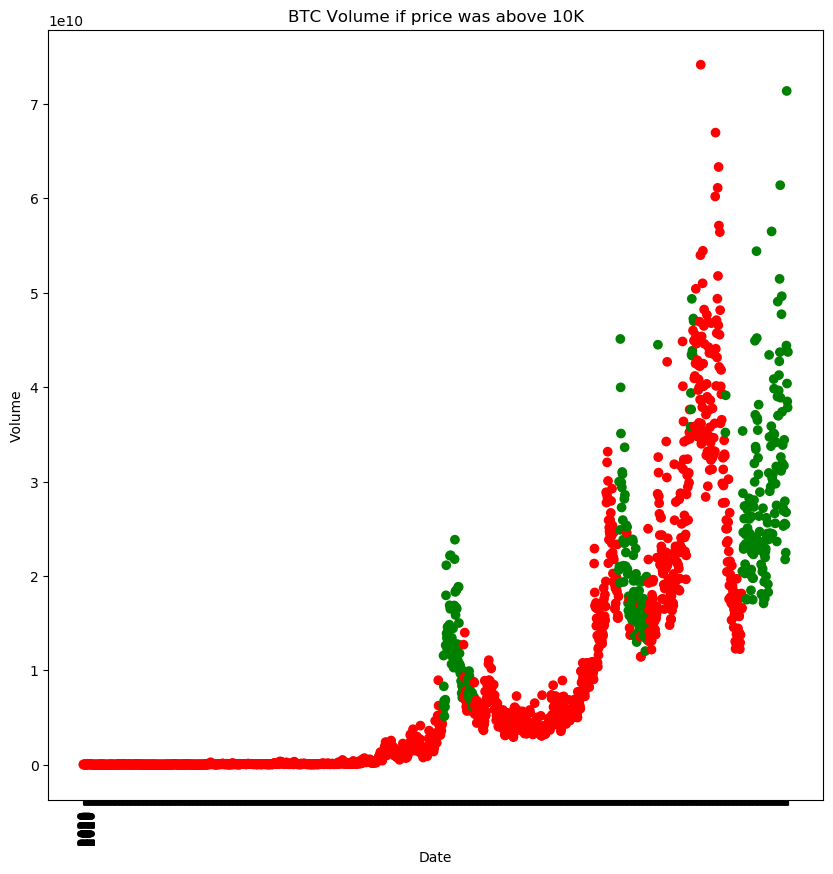

In [346]:
df['Above_10'] = df['High'].apply(lambda x: '1' if x > 10000 else '0')
df['Below_10'] = df['High'].apply(lambda x: '1' if x < 10000 else '0')


fig = plt.figure()
fig, ax = plt.subplots()

colors = {'1':'green', '0':'red'}

ax.scatter(df['Date'], df['Volume'], c=df['Above_10'].map(colors))
ax.axes.set_xticklabels(date_list, rotation=90)
plt.title("BTC Volume if price was above 10K")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.gcf().set_size_inches((10, 10))    
plt.show()

#### Histograms

In [ ]:

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

n_bins=10
ax1.hist(df['Volume'], bins=n_bins)
ax2.hist(df['High'], bins=n_bins)
# plt.title("Checking Histograms")
# plt.xlabel("Price")
# plt.ylabel("")

ax1.title.set_text('Checking Histograms (Volume)')
ax2.title.set_text('And its going well (High)')

plt.show()


##### Other plots:

Box - check

Sparklines - not solely, only as part of line chart.


##### Heatmap

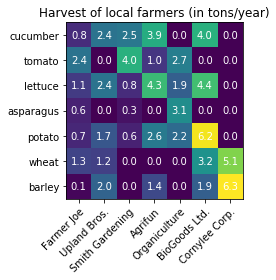

array([[0.8, 2.4, 2.5, 3.9, 0. , 4. , 0. ],
       [2.4, 0. , 4. , 1. , 2.7, 0. , 0. ],
       [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0. ],
       [0.6, 0. , 0.3, 0. , 3.1, 0. , 0. ],
       [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0. ],
       [1.3, 1.2, 0. , 0. , 0. , 3.2, 5.1],
       [0.1, 2. , 0. , 1.4, 0. , 1.9, 6.3]])

In [64]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")
#         print(harvest[i, j])
#         print(text)

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

harvest

###### Waterfall - available, but requires lots of lines of code and multiple imports. not the easiest.
###### Pairplots - available, pretty easy and robust.

#### Summary of Matplotlib

Bottom lines:
    1. basics are easy to use and very vertical.
    2. learning graph is very steep and very self-logic driven.
    3. veritically on the annotations and legends, both location and graphic wize.
    4. some of the more complex graphs are more complicated to do and requires major googling (waterfall for exmp.)

### Seaborn

##### Imports

In [76]:
import seaborn as sns
import matplotlib.ticker as ticker

# df = pd.read_csv('BTC-USD.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


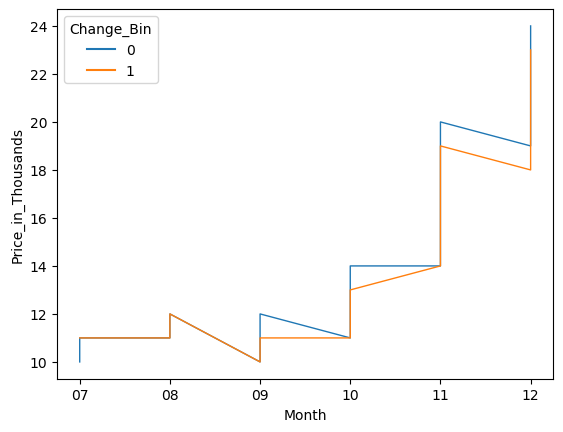

In [359]:
# If positive or negative change
df['Change'] = round(df['Open'] / df['Close'] * 100 - 100, 2)
df['Change_Bin'] = df['Change'].apply(lambda x : 1 if x > 0 else 0)
df['Price_in_Thousands'] = round(df['Close'] / 1000, 0)
df['Month'] = df['Date'].apply(lambda x : x[5:7] if x[:4] == '2020' else None)

sns.lineplot(data=df.tail(150), x="Month", y="Price_in_Thousands", hue='Change_Bin',
    estimator=None, lw=1)

# Very robust, can do any thing. needs to work on vis side of things.

##### Bar and Line comdined

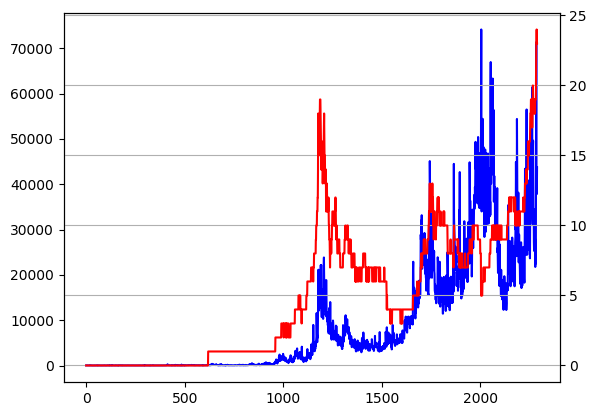

In [351]:
# Volume in divided by 1 mil
df['Volume_bin'] = df['Volume'].apply(lambda x : round(x / 1000000, 1))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df.Volume_bin, color='b')

ax2 = ax1.twinx()
ax2.plot(df.Price_in_Thousands, color='r')
ax2.grid(True)

plt.show()


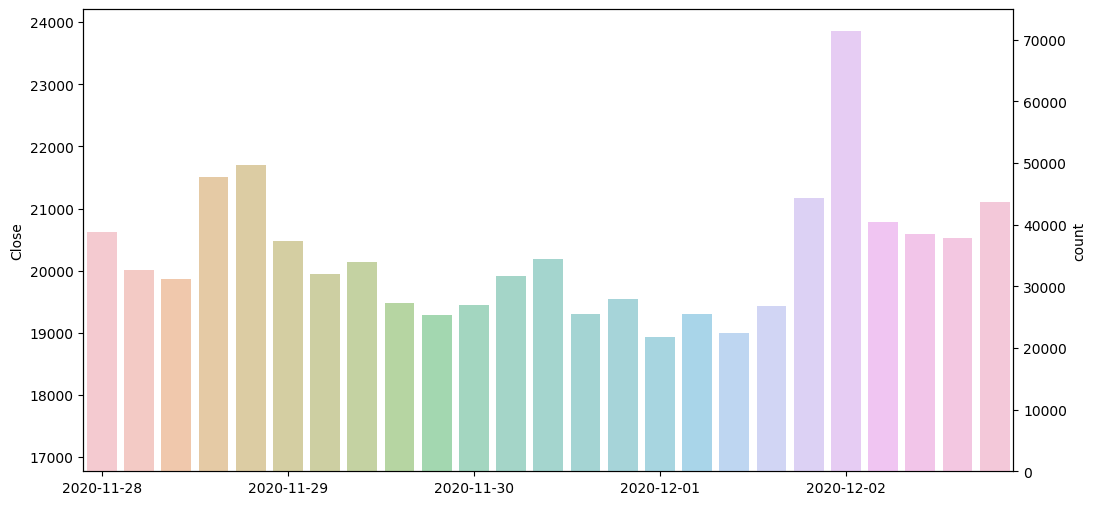

In [352]:
import datetime

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df['Date'] = df['Date'].apply(lambda x : datetime.datetime.strftime(x, '%Y-%m-%d'))

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df['Close'].tail(25), marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df, x=df['Date'].tail(25), y=df['Volume_bin'].tail(25), alpha=0.5, ax=ax2)

# Used to reduce the amt of values on x axis
plot_ = sns.countplot(x=df['Date'].tail(25), data=df.tail(25))
plot_.xaxis.set_major_locator(ticker.AutoLocator())

plt.show()


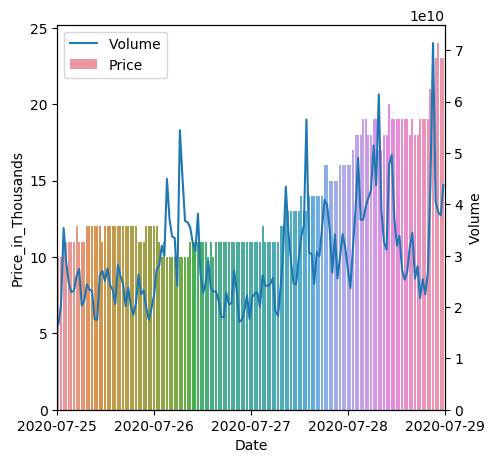

In [82]:
plt.subplots(figsize = (5, 5))

ax = sns.barplot(x=df['Date'].tail(150), y=df['Price_in_Thousands'].tail(150), data=df.tail(150))
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df.Volume.tail(150), label='Volume')
ax.set_xticklabels(ax.get_xticks())

# Used to reduce the amt of values on x axis
plot_ = sns.countplot(x=df['Date'].tail(150), data=df.tail(150))
plot_.xaxis.set_major_locator(ticker.LinearLocator(5))

ax2.legend()
plt.legend(labels=['Volume', 'Price'])

ax2.set(ylabel='Volume')

plt.show()

##### Scatter

Since i've already used it, i'll sum it up -
    1. very robust.
    2. supporting all symbols, colors and size options.
    3. minimum number of iterations with high control of legend.
    4. Difficulty level - medium - low.

##### Histograms

In [83]:
import os
import sys
!{sys.executable} -m pip install --upgrade pip==20.3.1 
!{sys.executable} -m pip install --upgrade seaborn==0.11.0
!{sys.executable} -m pip install statsmodels.api
!{sys.executable} -m pip install statsmodels
import statsmodels

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement statsmodels.api
ERROR: No matching distribution found for statsmodels.api
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


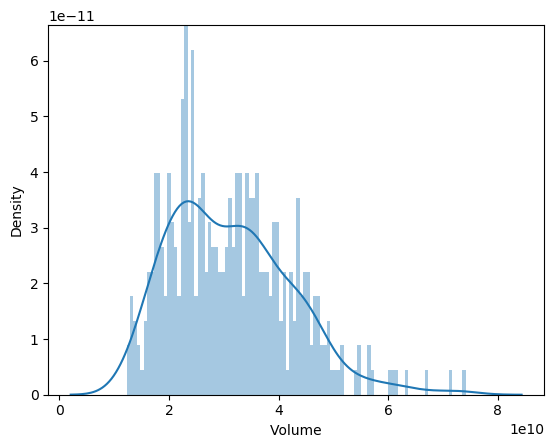

In [92]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(df['Volume'].tail(365) ,kde = True ,bins=100)
plt.show()

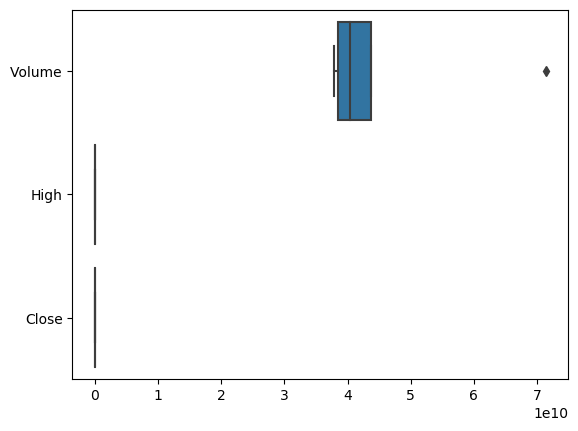

In [85]:
ax = sns.boxplot(data=df[['Volume', 'High', 'Close']].tail(5), orient="h")
plt.show()

In [86]:
iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


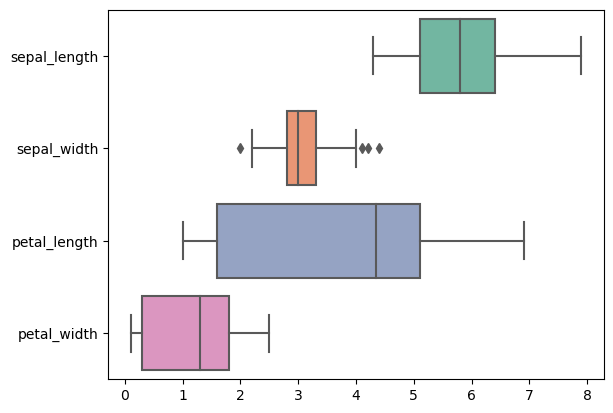

In [87]:
ax = sns.boxplot(data=iris, orient="h", palette="Set2")

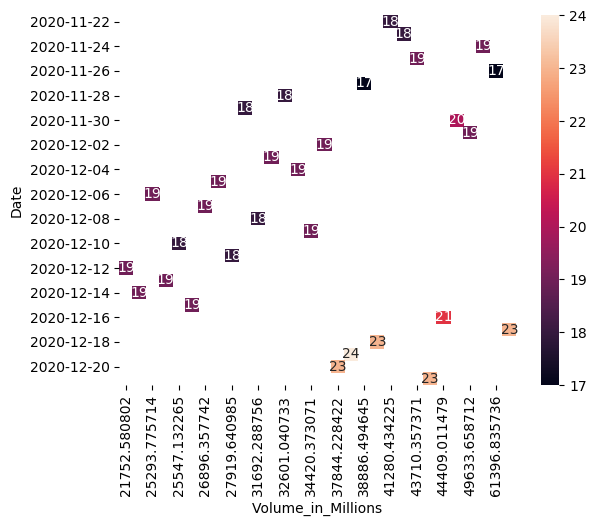

In [355]:
df['Month'] = df['Date'].apply(lambda x : x[5:7])
df['Year'] = df['Date'].apply(lambda x : x[:4])
df['Year'] = df['Date'].apply(lambda x : x[:4])
df['Volume_in_Millions'] = df['Volume'].apply(lambda x : x / 1000000)
df.tail()


# # flights = sns.load_dataset("flights")
temp_df = (df.tail(30)).pivot("Date", "Volume_in_Millions", "Price_in_Thousands")
ax = sns.heatmap(temp_df, annot=True)

# TODO - solve the error


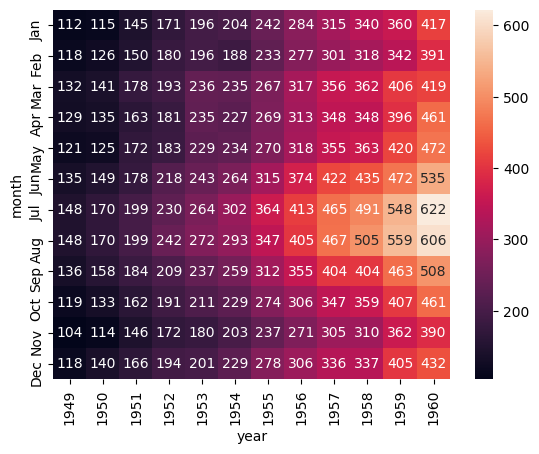

In [96]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights, annot=True, fmt="d")

# Or just like this

##### Bottom lines regarding heatmaps -

    1. Very easy to use, highly configurable.
    2. Good visualisation level.

##### Waterfall

    same issues as matplotlib - no embededd solution. need to be configured.

##### Pairplots

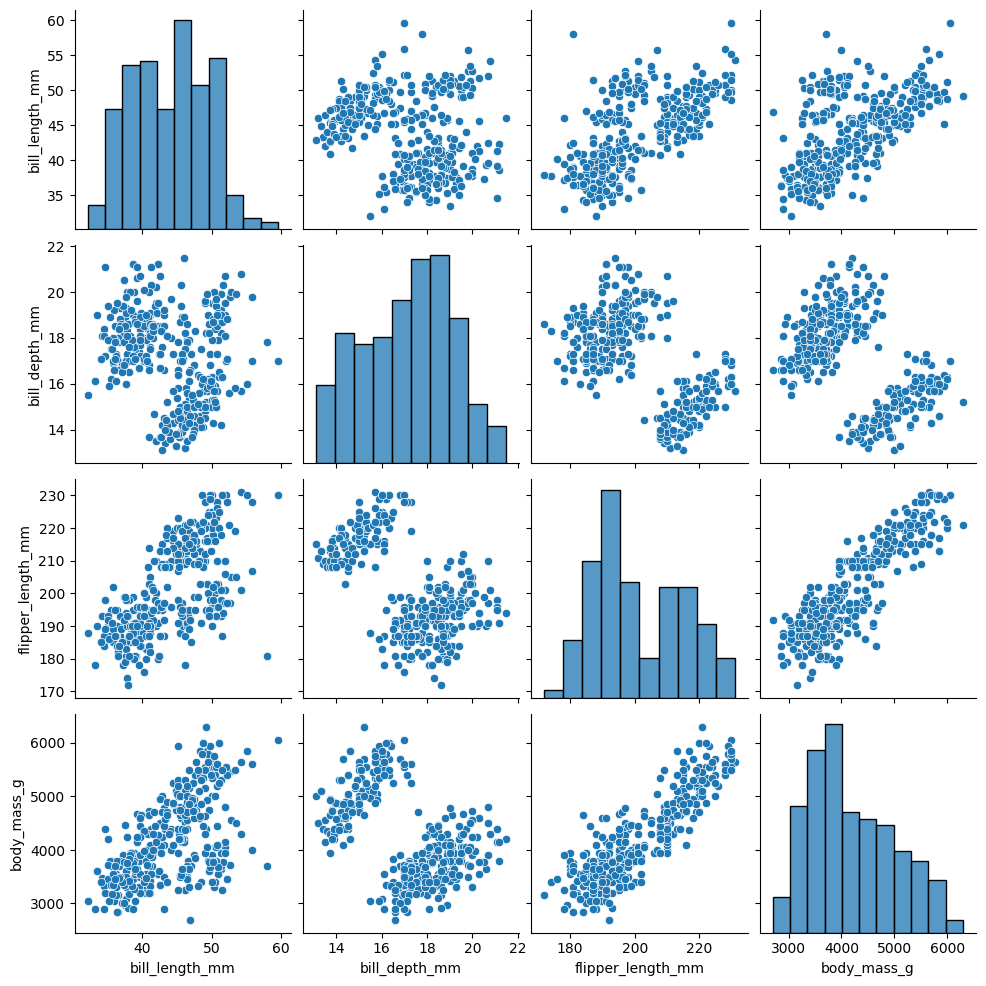

In [97]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)


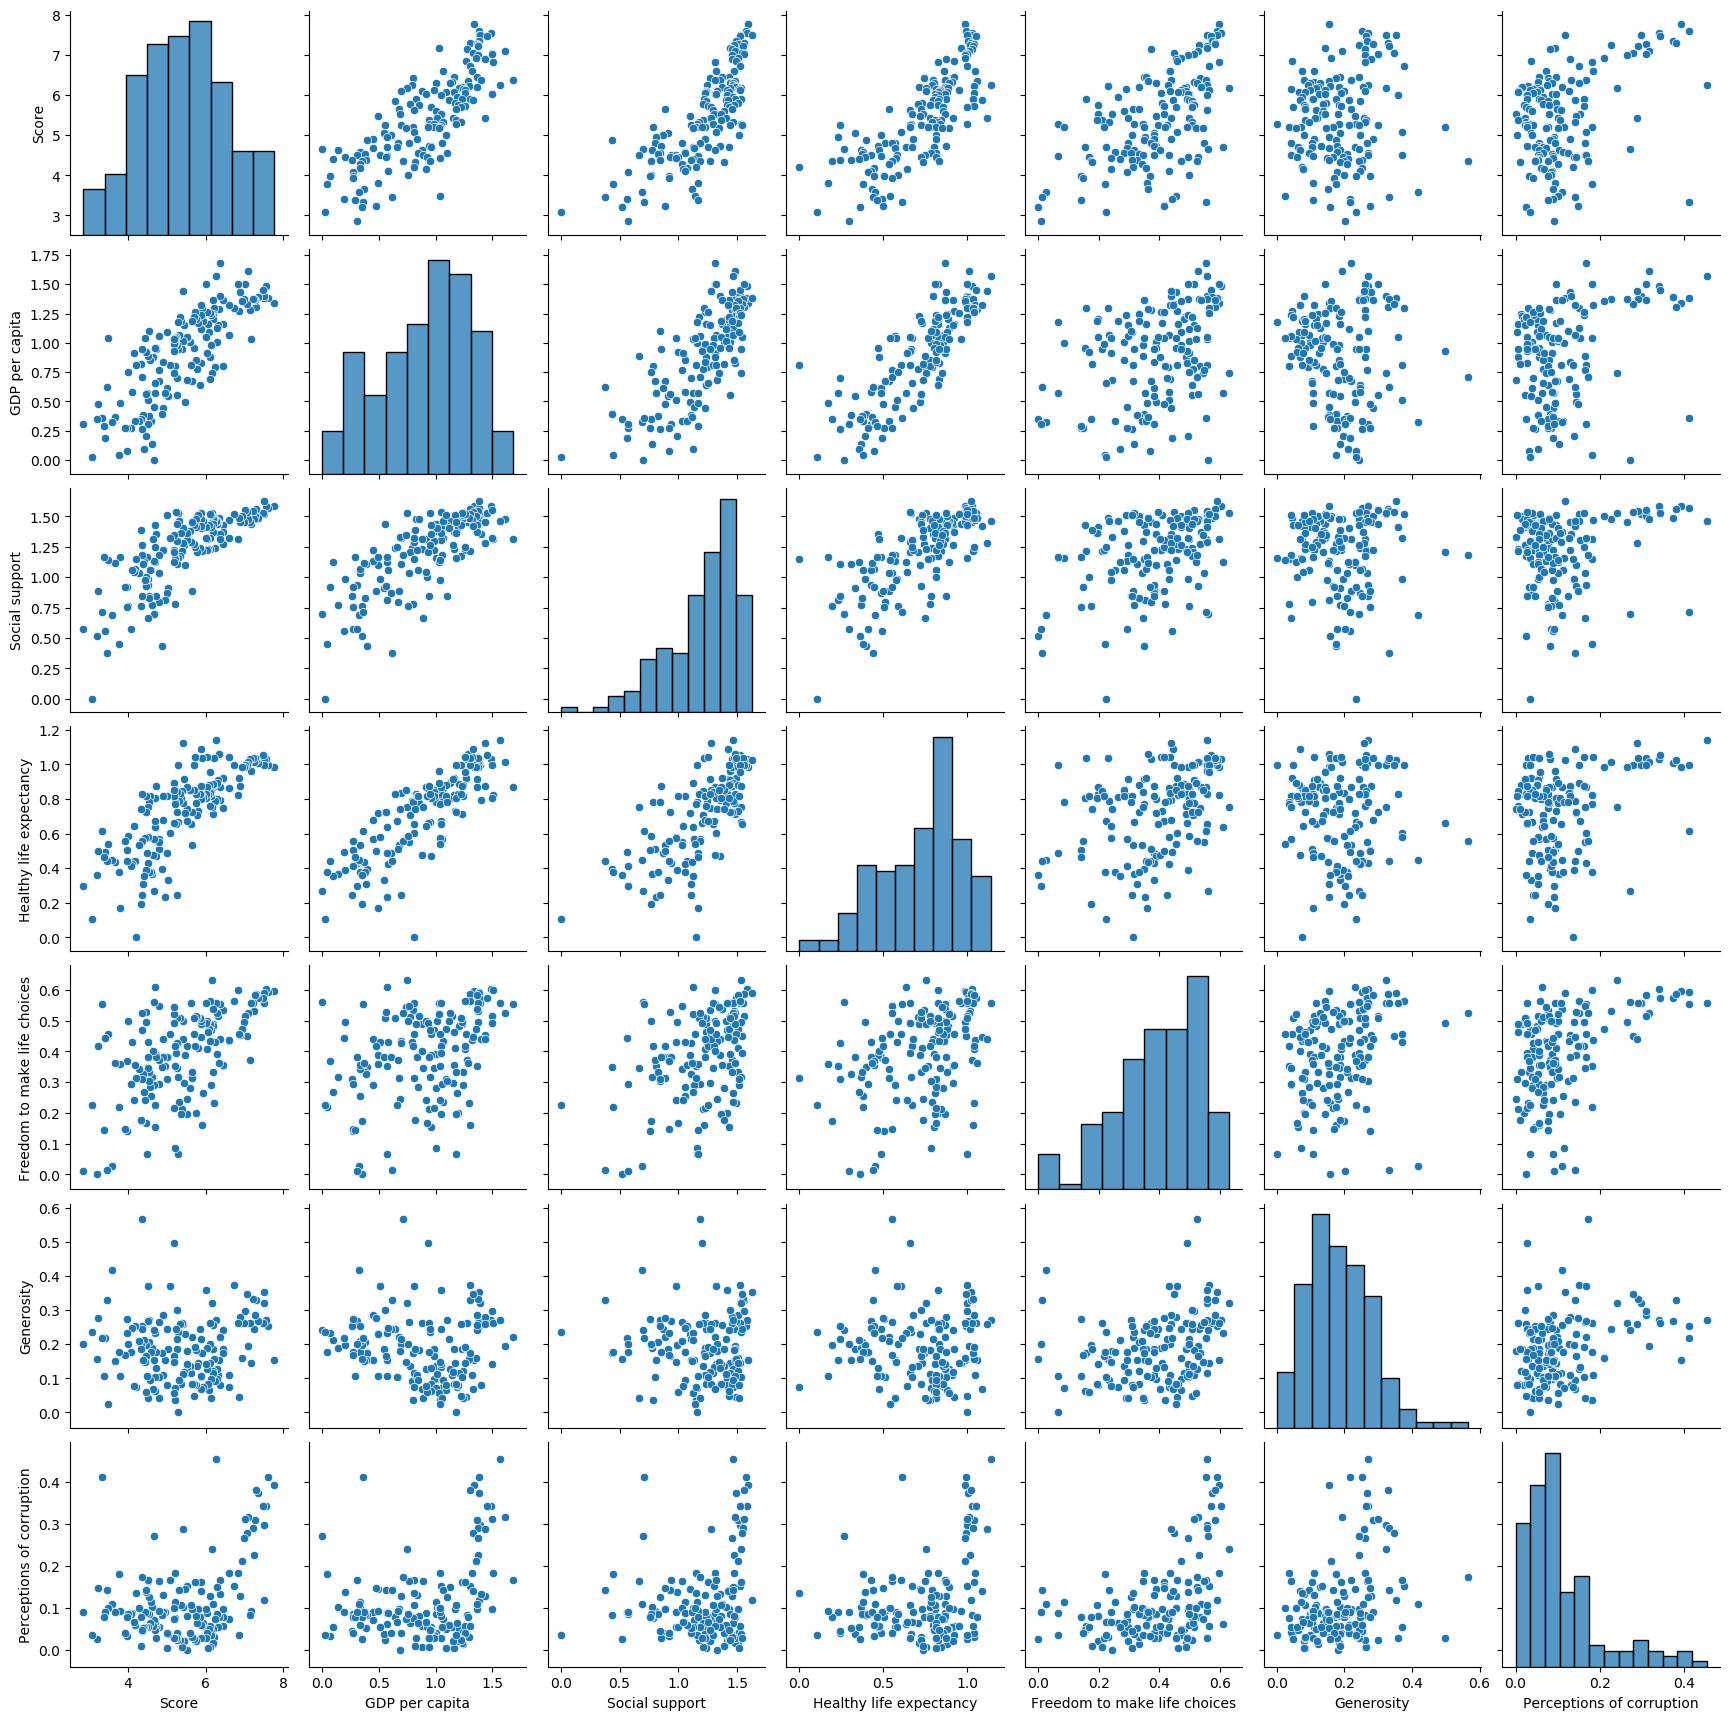

In [98]:
report2019 = pd.read_csv("2019.csv")
report2019 = report2019.loc[:, report2019.columns != 'Overall rank']
sns.pairplot(report2019)

####  Pairplot bottom line:

very useful for the analyst in order to approach the data and better understand it;
unfortunately, I don't a scenario where we will be using it in one of our skills.

#### Summary of Seaborn:

1. feels very similar to matplotlib, same for use and same for functionalities, for the good and the bad.
2. visualisations are decent, non dynamic, but are easier to apply then matplotlib, while in some cases it has solutions, when matplotlib dosen't.
3. botton line, in my opinion, a very good candidate.

### Plotly

##### Imports

In [99]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [353]:
df['Volume_div'] = df['Volume'].apply(lambda x : round(x / 1500000, 2))
df['Change_plus'] = df['Change'].apply(lambda x : x*1000)

time_frame = 3000

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(x=df['Date'].tail(time_frame),
                         y=df['Close'].tail(time_frame),
                         name="Price",
                         line = dict(color='blue')))
fig.add_trace(go.Scatter(x=df['Date'].tail(time_frame),
                         y=df['Change_plus'].tail(time_frame),
                         name="% Change",
                         line = dict(color='orange')))
fig.add_trace(go.Scatter(x=df['Date'].tail(time_frame),
                         y=df['Volume_div'].tail(time_frame),
                         name="Volume",
                         line = dict(color='red')))

fig.update_layout(
    title=f"<b>Volume correlated with Price for BTC, Last {time_frame}<b>",
    xaxis_title="Time",
    yaxis_title="Price")

fig.update_layout(legend=dict(
    orientation="h", # to position it horizontically or vertically
    yanchor="middle", # top / bottom / middle
    y=1, 
    xanchor="left",
    x=0
    # X and Y are used to position as part of the whole frame
))

fig.show()

Very easy to add subplots.
More complicated and limited with sorrunded issues such as legend, its location and more.

Major miss - there is no way I findto add a sub-title next to the title (by that I mean - not within the frame of the analysis).

#### Scatter

In [117]:
fig = px.scatter(df.tail(150), x="Date", y="Close", color="Change",
                 size='Volume_bin')
fig.show()

In [145]:
import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator

raw_symbols = SymbolValidator().values
namestems = []
namevariants = []
symbols = []
for i in range(0,len(raw_symbols),3):
    name = raw_symbols[i+2]
    symbols.append(raw_symbols[i])
    namestems.append(name.replace("-open", "").replace("-dot", ""))
    namevariants.append(name[len(namestems[-1]):])

fig = go.Figure(go.Scatter(mode="markers", x=df.Date.tail(30), y=df.Price_in_Thousands.tail(30), marker_symbol=symbols))
fig.update_layout(title="Price in thousands", xaxis_side="bottom", height=600, width=600)

fig.update_traces(marker=dict(size=12))

fig.show()

# As u can see, there are duplicates for the same row and no; looks like it creates a distinctinazation of each (x,y)
# Which in some cases is usefull, while in other its not.

# Also symbol and size cannot work together since whenever symbol goes in, size. need to be hard coded and not by param.


##### Histograms

In [155]:
fig = px.histogram(df.tail(150), x="Volume_bin", nbins=20, color='Price_in_Thousands')
fig.show()

In [159]:
fig = go.Figure(data=[go.Histogram(y=df.Price_in_Thousands)])
fig.update_layout(
    title_text='Testing of Vertical Histogram',
    xaxis_title_text='Count', # xaxis label
    yaxis_title_text='Price in thousands', # yaxis label
    bargap=0.2,
    bargroupgap=0.1
)
fig.show()

In [356]:
df2015 = df.loc[df['Year'] == '2015']
df2016 = df.loc[df['Year'] == '2016']
df2017 = df.loc[df['Year'] == '2017']
df2018 = df.loc[df['Year'] == '2018']
df2019 = df.loc[df['Year'] == '2019']
df2020 = df.loc[df['Year'] == '2020']

fig = make_subplots(rows=2, cols=2)

trace0 = go.Histogram(x=df2015.Change, nbinsx=4, name='2015')
trace1 = go.Histogram(x=df2016.Volume_bin, nbinsx = 8, name='2016')
trace2 = go.Histogram(x=df2017.Volume_bin, nbinsx=10, name='2017')
trace3 = go.Histogram(x=df2018.Volume_bin, name='2018')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig.show()

Key notes regarding histograms on plotly :
    1. very easy to use, and specifically for mulitple graphs.
    2. dynamic, and with auto bin feature embedded.

##### Box plots - exists; didn't checked deeply since there are no major specifications for it.

##### Sparklines - exists; didn't checked deeply since there are no major specifications for it.

In [180]:
df['Month'] = df['Date'].apply(lambda x : x[5:7])
df['Year'] = df['Date'].apply(lambda x : x[:4])
df['Volume_in_Millions'] = df['Volume'].apply(lambda x : x / 1000000)
df.tail()


# # flights = sns.load_dataset("flights")
temp_df = (df.tail(30)).pivot("Date", "Volume_in_Millions", "Price_in_Thousands")
fig = px.imshow(temp_df)
fig.show()

In [181]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

fig = px.imshow(flights)
fig.show()

##### Waterfall

In [182]:
fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative", "relative", "total", "relative", "relative", "total"],
    x = ["Sales", "Consulting", "Net revenue", "Purchases", "Other expenses", "Profit before tax"],
    textposition = "outside",
    text = ["+60", "+80", "", "-40", "-20", "Total"],
    y = [60, 80, 0, -40, -20, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Profit and loss statement 2018",
        showlegend = True
)

fig.show()

In [ ]:
fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative", "relative", "total", "relative", "relative", "total"],
    x = ["Sales", "Consulting", "Net revenue", "Purchases", "Other expenses", "Profit before tax"],
    textposition = "outside",
    text = ["+60", "+80", "", "-40", "-20", "Total"],
    y = [60, 80, 0, -40, -20, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Profit and loss statement 2018",
        showlegend = True
)

fig.show()

In [221]:
df['Change'] = (df['Close'] / df['Open'] - 1) * 100
df['Price_Change'] = (df['Close'] - df['Open'])


df2020 = df.loc[df['Year'] == '2020']
df2020 = df.tail(90)

dates2020 = df2020.Date.tolist()
change2020 = df2020.Change.tolist()
price_change2020 = df2020.Price_Change.tolist()

In [222]:
fig = go.Figure(go.Waterfall(
    name = "Price Change", orientation = "v",
#     measure = ["relative", "relative", "total", "relative", "relative", "total"],
    x = dates2020,
    textposition = "outside",
    text = [i for i in price_change2020],
    y = price_change2020,
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "BTC price change along the last 15 days",
        showlegend = True
)

fig.show()

# As seen here, very easy to use feature which some of the other libraries doesn't have.

##### Pairplot

In [225]:
fig = px.scatter_matrix(df[['Year', 'Open', 'Close']])
fig.show()

# Plotly's equivilent to pairplots, by seaborn

##### Bottom lines:
    1. Plotly is very visual and easy to config library, which houses some key visualisation templates, such as water falls and more.
    2. On the other hand, it is limited in some features, also more graphical one but also analysis based ones; among these we can find the inability to use symbols combined with size and color on scatter plots or even place text outside the figure plot.
    3. Also, this library is highly configureable and easy to use, especially if using the plotly-studio.

#### Bokeh

##### imports

In [510]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral11
from bokeh.models import FactorRange
from bokeh.plotting import figure
from bokeh.sampledata.iris import flowers
from bokeh.transform import factor_cmap, factor_mark
import scipy.special
from bokeh.layouts import gridplot
from numpy import histogram, linspace
from scipy.stats.kde import gaussian_kde

output_notebook()

Loading BokehJS ...

In [266]:

p = figure(plot_width=400, plot_height=400)

# output_file("line.html")

p.line([i for i in range(1, 91)], df['Price_in_Thousands'].tail(90), line_width=2)

show(p)

In [298]:
# instantiating the figure object  
graph = figure(title = "Bokeh Multi Line Graph")  
     
# the points to be plotted  
xs = [[1, 2, 3, 4, 5], [-4, -2, 0, 2, 4]]  
ys = [[5, 3, 8, 0], [5, -4, 10, -2, 5]]  
    
# plotting the graph  
graph.multi_line(xs, ys)  
     
# displaying the model  
show(graph)

## Not quite easy to use; and as of now, looks like its support with time series is limited

##### Bar & Line

In [393]:
grouped_by_month = df.groupby(['Month'])['Close'].mean()
mean_of_price_month = grouped_by_month.tolist()

df.loc[df.Month.isin(['01', '02', '03']), 'Quarter'] = 'Q1'
df.loc[df.Month.isin(['04', '05', '06']), 'Quarter'] = 'Q2'
df.loc[df.Month.isin(['09', '08', '07']), 'Quarter'] = 'Q3'
df.loc[df.Month.isin(['10', '11', '12']), 'Quarter'] = 'Q4'

grouped_by_quarter = df.groupby(['Quarter'])['Close'].mean()
mean_of_price_quarter = grouped_by_quarter.tolist()

factors = [
    ("Q1", "jan"), ("Q1", "feb"), ("Q1", "mar"),
    ("Q2", "apr"), ("Q2", "may"), ("Q2", "jun"),
    ("Q3", "jul"), ("Q3", "aug"), ("Q3", "sep"),
    ("Q4", "oct"), ("Q4", "nov"), ("Q4", "dec"),
]


p = figure(x_range=FactorRange(*factors), plot_height=250,
           toolbar_location=None, tools="")

p.vbar(x=factors, top=mean_of_price_month, width=0.9, alpha=0.5)

p.line(x=["Q1", "Q2", "Q3", "Q4"], y=mean_of_price_quarter, color="red", line_width=2)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

# Sidenote, took me a while to config this...

#### Scatter Bokeh

In [394]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

output_file("color_scatter.html", title="color_scatter.py example")

show(p)

Regarding symbols, size and colors all together in order to achieve maximum diversity, looks like the way of working on it would be while iterating the diffrences.

In [496]:
from random import randrange
print(randrange(10))
flowers['size'] = flowers['species'].apply(lambda x : randrange(10))
flowers.head()

SPECIES = ['setosa', 'versicolor', 'virginica']
MARKERS = ['hex', 'circle_x', 'triangle']

p = figure(title = "Iris Morphology", background_fill_color="#fafafa")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Sepal Width'

p.scatter("petal_length", "sepal_width", source=flowers, legend_label="species", 
          fill_alpha=0.4, size ='size',
          marker=factor_mark('species', MARKERS, SPECIES),
          color=factor_cmap('species', 'Category10_3', SPECIES))

p.legend.location = "top_right" # or center or bottom, side by left, center, right
p.legend.click_policy="hide"

p.legend.title = 'Example Title'

labels = LabelSet(x='weight', y='height', text='names', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')

citation = Label(x=5.5, y=4.57,
                 text='Checking labels', render_mode='css',
                 border_line_color='orange', border_line_alpha=2.0,
                 background_fill_color='black', background_fill_alpha=.0)

citation1 = Label(x=1., y=2,
                 text='Checking labels on top of Graph', render_mode='css',
                 border_line_color=None, border_line_alpha=2.0,
                 background_fill_color='black', background_fill_alpha=.0)

p.add_layout(labels)
p.add_layout(citation)
p.add_layout(citation1)


show(p)

8


In [516]:
pdf = gaussian_kde(df.Price_in_Thousands)

x = linspace(0,250,200)

p = figure(x_axis_type="log", plot_height=300)
p.line(x, pdf(x))

# plot actual hist for comparison
hist, edges = histogram(df.Volume_bin, density=True, bins=20)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], alpha=0.4)

output_file("hist.html")

show(p)

#TODO - Solve this histogram issue

In [505]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Above_10,Below_10,Change,Change_Bin,Price_in_Thousands,Month,Volume_bin,Volume_div,Change_plus,Year,Volume_in_Millions,Quarter
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0,1,1.87,1,0.0,None,21.1,14.04,1870.0,2014,21.0568,None
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0,1,7.64,1,0.0,None,34.5,22.99,7640.0,2014,34.4832,None
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0,1,7.42,1,0.0,None,37.9,25.28,7420.0,2014,37.9197,None
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0,1,-3.48,0,0.0,None,36.9,24.58,-3480.0,2014,36.8636,None
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,0,1,2.32,1,0.0,None,26.6,17.72,2320.0,2014,26.5801,None
